# Visualize, Evaluate and Compare Performance

In [1]:
# table of contents needs to be updateddddd !!!!

## Table of Contents
- [1. Imports](#1-imports)
   - [1.1. Import Necessary Libraries](#11-import-necessary-libraries)
   - [1.2. Import Data](#12-import-data)
- [2. Visualizations](#2-visualizations)
   - [2.1. Average Best Fitness (per generation)](#21-average-best-fitness-(per-generation))
   - [2.2. Median Best Fitness (per generation)](#22-median-best-fitness-(per-generation))
   - [2.3. Best Fitness (per run)](#23-best-final-fitness-(per-run))
   - [2.4. Average Best Fitness of each mutation (per generation)](#24-average-best-fitness-of-each-mutation-(per-generation))
- [3. Metrics](#3-metrics)

## 1. Imports

### 1.1. Import Necessary Libraries

__`Step 1`__ Import necessary libraries.

In [2]:
import pandas as pd
from library.performance_analysis import *

### 1.2. Import Data

__`Step 2`__ Import the data from our runs.

In [3]:
df_exp1 = pd.read_csv('combination_search/final_results_exp1.csv')
df_exp2 = pd.read_csv('combination_search/final_results_exp2.csv')
df_exp3 = pd.read_csv('combination_search/final_results_exp3.csv')

#df_elitism = pd.read_csv('combination_search/elitism_exp.csv')

#print(df_exp1.head())
#print(df_exp2.head())
#print(df_exp3.head())

#CORRIGIR NOMES

## 2. Visualizations

### 2.1. Intra-Run Analysis: Median Best Fitness

__`Step 3`__ Plot the Median best fitness of each generation of each combination.

In [4]:
plot_ABF_MBF(df_exp1, exp_comb='1', metric='MBF')
plot_ABF_MBF(df_exp2, exp_comb='2', metric='MBF')
plot_ABF_MBF(df_exp3, exp_comb='3', metric='MBF')

### 2.2. Inter-Run Analysis: Stability of the combination

__`Step 4`__ Check ABF, STD and ABF/STD on all combinations to access stability.

In [6]:
get_abf_stats(df_exp1)[0]


Most Stable Comb: ('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')
Least Stable Comb: ('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD,ABF^2/STD - ABF
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.278492,0.041743,30.627655,37.878720
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.436627,0.030591,46.962975,66.031651
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.258933,0.044113,28.538627,34.669277
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.609877,0.044517,36.163397,56.608744
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.242853,0.043635,28.483168,34.157529
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.427883,0.025023,57.063875,80.052635
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.256759,0.049787,25.242767,30.467324
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.563082,0.049363,31.664938,47.931822
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.284225,0.029379,43.712327,54.852223
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.407412,0.023752,59.255029,81.988807


In [ ]:
get_abf_stats(df_exp2)[0]

Most Stable Comb: ('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')
Least Stable Comb: ('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.272783,0.021282,59.805109
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.394262,0.028393,49.105396
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.272120,0.033075,38.461154
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.537450,0.033670,45.662073
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.263792,0.048971,25.807187
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.467102,0.029891,49.081456
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.243384,0.039730,31.295865
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.620897,0.046539,34.828884
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.303605,0.024813,52.538194
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.362315,0.028431,47.916294


In [ ]:
get_abf_stats(df_exp3)[0]


Most Stable Comb: ('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')
Least Stable Comb: ('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')


,Combination,ABF,STD,ABF/STD
0,"('block_rotation_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.252681,0.033109,37.835319
1,"('block_rotation_mutation', 'cyclic_crossover', 'tournament_selection')",1.470405,0.024453,60.132431
2,"('block_rotation_mutation', 'partially_mapped_crossover', 'linear_ranking_selection')",1.268954,0.038451,33.001957
3,"('block_rotation_mutation', 'partially_mapped_crossover', 'tournament_selection')",1.618567,0.047021,34.422370
4,"('semi_shuffle', 'cyclic_crossover', 'linear_ranking_selection')",1.246513,0.037457,33.278479
5,"('semi_shuffle', 'cyclic_crossover', 'tournament_selection')",1.476043,0.029899,49.367011
6,"('semi_shuffle', 'partially_mapped_crossover', 'linear_ranking_selection')",1.243417,0.047452,26.203828
7,"('semi_shuffle', 'partially_mapped_crossover', 'tournament_selection')",1.663101,0.056566,29.401202
8,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'linear_ranking_selection')",1.307608,0.045268,28.885799
9,"('two_phase_shuffle_mutation', 'cyclic_crossover', 'tournament_selection')",1.380277,0.035188,39.225393


__`Step 5`__ Plot the best fitness of each run (for some combinations). Choosing to visualize the ones considered the best and least stable combination of each experiment.

In [ ]:
plot_BF_inter_run_boxplot(df_exp1, exp_comb='1')
plot_BF_inter_run_boxplot(df_exp2, exp_comb='2')
plot_BF_inter_run_boxplot(df_exp3, exp_comb='3')

In [ ]:
#only plot those of interest
plot_BF_inter_run(df_exp1, ['TCT', 'SPL'], '1')
plot_BF_inter_run(df_exp2, ['BPL', 'SPL'], '2')
plot_BF_inter_run(df_exp3, ['BCT', 'SPL'], '3')

### 2.3. Between Experiments: Comparison of probabilities

__`Step 6`__ Scatter the final results of each combination per experiment, and for each experiment by combination.


In [ ]:
exp_bf_per_comb({'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2', 'exp3': 'Probability of Mutation: 0.3'})

In [ ]:
comb_bf_per_exp({'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2', 'exp3': 'Mut: 0.3'})

__`Step 7`__ For each combination, plot the different experiments (with different probabilities), along with standart deviation.

In [ ]:
# Checking only the combinations that had the best fitness and most stability for each experiment

comb_between_exp(df_exps = {'exp1': 'Probability of Mutation: 0.1', 'exp2': 'Probability of Mutation: 0.2',
                            'exp3': 'Mut: 0.3'
                            }, comb_ids=['BPT', 'BPL'],
                            metric='MBF',
                            std=True
                            )#,'TPT', 'SPT', 'BPL', 'TPL', 'SPL'])

### 2.4. Plotting all together (per Combination+Experiment)

__`Step 8`__ By selecting x best combinations of each experiment, plot them all together, so we can have a full picture of combinations and their experiment (where it was only changed probabilities).

In [1]:
import pandas as pd
from library.performance_analysis import *

In [5]:
plot_Xbest_per_exp(Xbest=2, df_exps={'exp1': 'Prob Mut 0.1', 'exp2': 'Prob Mut 0.2', 'exp3': 'Customized Prob Muts'}, std=True)

In [191]:
plot_Xbest_per_exp_box(Xbest=3, metric='ABF',
                       df_exps={'exp1': 'Prob Mut 0.1', 'exp2': 'Prob Mut 0.2', 'exp3': 'Customized Prob Muts'})

### 2.5. Elitism Experiment: Comparison of Final Combination with and without elitism

__`Step 10`__ For the final combination, plot the best fitness per generation with and without the result.

In [ ]:
#elistim_tuning_plot(df_elitism)

## 3. Statistical tests

In [47]:
from scipy.stats import mannwhitneyu, ranksums
from typing import List, Tuple, Dict, Any
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
def pairwise_mannwhitney(combs: List[Tuple], alpha:float = 0.05, plot:bool = True) -> Dict[str, Any]:
    """
    Perform pairwise Mann-Whitney U tests on the provided combinations and visualize results.

    Parameters:
    - combs: List of tuples containing combinations to compare.
    - alpha: Significance level for the tests.
    - plot: Whether to generate a visualization of the results.

    Returns:
    - Dictionary with combinations as keys and p-values as values.
    """

    df_exp1 = pd.read_csv('combination_search/final_results_exp1.csv')
    df_exp2 = pd.read_csv('combination_search/final_results_exp2.csv')
    df_exp3 = pd.read_csv('combination_search/final_results_exp3.csv')

    data_combs = []
    labels = []
    
    for comb, exp in combs:
        if exp == 'exp1':
            df = df_exp1
        elif exp == 'exp2':
            df = df_exp2
        else:
            df = df_exp3

        # Get the last generation fitness values for all runs of this combination
        data = df[(df['Combination ID'] == comb) & (df['Generation'] == df['Generation'].max())]['Fitness'].values
        data_combs.append(data)
        labels.append(f"{comb}({exp})")

    # Perform pairwise Mann-Whitney U tests
    n = len(combs)
    p_values = np.zeros((n, n))
    significant = np.zeros((n, n))

    results = {}
    for i in range(n):
        for j in range(n):
            if i == j:
                p_values[i, j] = 1.0
                continue
                
            stat, p_value = mannwhitneyu(data_combs[i], data_combs[j], alternative='two-sided')
            p_values[i, j] = p_value
            significant[i, j] = p_value < alpha
            
            key = f"{labels[i]} vs {labels[j]}"
            results[key] = {
                'statistic': stat,
                'p_value': p_value,
                'significant': p_value < alpha
            }
    
    if plot:
        plt.figure(figsize=(6, 5))
        
        # Create custom color palette
        cmap = sns.color_palette("YlOrRd_r", as_cmap=True)
        
        # Create heatmap for p-values
        mask = np.triu(np.ones_like(p_values, dtype=bool))
        
        # Format annotations to show significance level with stars
        annot = np.empty_like(p_values, dtype=object)
        for i in range(n):
            for j in range(n):
                if mask[i, j]:
                    annot[i, j] = ""
                else:
                    stars = ""
                    if p_values[i, j] < 0.001:
                        stars = "***"
                    elif p_values[i, j] < 0.01:
                        stars = "**"
                    elif p_values[i, j] < 0.05:
                        stars = "*"
                    annot[i, j] = f"{p_values[i, j]:.3f}{stars}"
        
        ax = sns.heatmap(p_values, annot=annot, fmt="", mask=mask, 
                        cmap=cmap, xticklabels=labels, yticklabels=labels,
                        vmin=0, vmax=alpha*2, square=True, 
                        cbar_kws={"shrink": 0.8, "label": "p-value"})
        
        # Add grid for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        
        # # Add border to significant cells
        # for i in range(n):
        #     for j in range(n):
        #         if i != j and not mask[i, j] and significant[i, j]:
        #             ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='blue', lw=2, linestyle='--'))
        
        plt.title(f'Pairwise Mann-Whitney U Test p-values\n*p<0.05, **p<0.01, ***p<0.001', fontsize=14)
        plt.tight_layout()
        

        
        plt.show()
    
    return results

In [50]:
def pairwise_ranksums(combs: List[Tuple], alpha: float = 0.05, plot: bool = True) -> Dict[str, Any]:
    """
    Perform pairwise Wilcoxon rank-sum test on the provided combinations and visualize results.

    Parameters:
    - combs: List of tuples containing combinations to compare.
    - alpha: Significance level for the tests.
    - plot: Whether to generate a visualization of the results.

    Returns:
    - Dictionary with combinations as keys and test results as values.
    """

    df_exp1 = pd.read_csv('combination_search/final_results_exp1.csv')
    df_exp2 = pd.read_csv('combination_search/final_results_exp2.csv')
    df_exp3 = pd.read_csv('combination_search/final_results_exp3.csv')

    data_combs = []
    labels = []
    
    for comb, exp in combs:
        if exp == 'exp1':
            df = df_exp1
        elif exp == 'exp2':
            df = df_exp2
        else:
            df = df_exp3

        # Get the last generation fitness values for all runs of this combination
        data = df[(df['Combination ID'] == comb) & (df['Generation'] == df['Generation'].max())]['Fitness'].values
        data_combs.append(data)
        labels.append(f"{comb}({exp})")

    # Perform pairwise Mann-Whitney U tests (ranksum tests)
    n = len(combs)
    p_values = np.zeros((n, n))
    significant = np.zeros((n, n))

    results = {}
    for i in range(n):
        for j in range(i+1, n):  # Only compute lower triangle to avoid redundant calculations
            # scipy.stats.ranksums is equivalent to mannwhitneyu with alternative='two-sided'
            stat, p_value = ranksums(data_combs[i], data_combs[j])
            p_values[i, j] = p_value
            p_values[j, i] = p_value  # Matrix is symmetric
            significant[i, j] = p_value < alpha
            significant[j, i] = p_value < alpha
            
            key = f"{labels[i]} vs {labels[j]}"
            results[key] = {
                'statistic': stat,
                'p_value': p_value,
                'significant': p_value < alpha
            }
    
    # Set diagonal to 1.0
    np.fill_diagonal(p_values, 1.0)
    
    if plot:
        plt.figure(figsize=(6, 5))
        
        # Create custom color palette
        cmap = sns.color_palette("YlOrRd_r", as_cmap=True)
        
        # Create heatmap for p-values
        mask = np.triu(np.ones_like(p_values, dtype=bool))
        
        # Format annotations to show significance level with stars
        annot = np.empty_like(p_values, dtype=object)
        for i in range(n):
            for j in range(n):
                if mask[i, j]:
                    annot[i, j] = ""
                else:
                    stars = ""
                    if p_values[i, j] < 0.001:
                        stars = "***"
                    elif p_values[i, j] < 0.01:
                        stars = "**"
                    elif p_values[i, j] < 0.05:
                        stars = "*"
                    annot[i, j] = f"{p_values[i, j]:.3f}{stars}"
        
        ax = sns.heatmap(p_values, annot=annot, fmt="", mask=mask, 
                        cmap=cmap, xticklabels=labels, yticklabels=labels,
                        vmin=0, vmax=alpha*2, square=True, 
                        cbar_kws={"shrink": 0.8, "label": "p-value"})
        
        # Add grid for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        
        plt.title(f'Pairwise Ranksum Test p-values\n*p<0.05, **p<0.01, ***p<0.001', fontsize=14)
        plt.tight_layout()
        plt.show()
    
    return results


### Effect of different probabilities in mutations

- #### Semi-shuffle:

In [21]:
S_combs = [('SPT', 'exp1'), ('SPT', 'exp2'), ('SPT', 'exp3')]

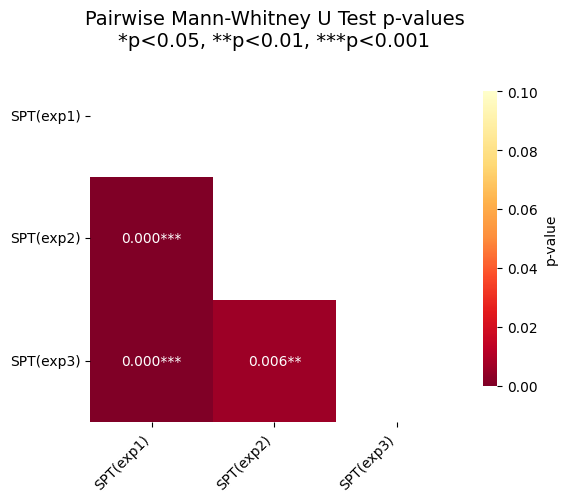

In [51]:
_ = pairwise_mannwhitney(S_combs, alpha=0.05)

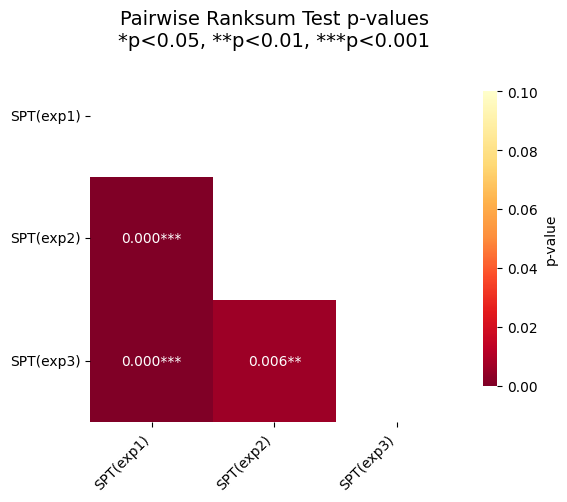

In [52]:
_ =pairwise_ranksums(S_combs, alpha=0.05)

- #### Block-rotation:

In [57]:
B_combs = [('BPT', 'exp1'), ('BPT', 'exp2'), ('BPT', 'exp3')]

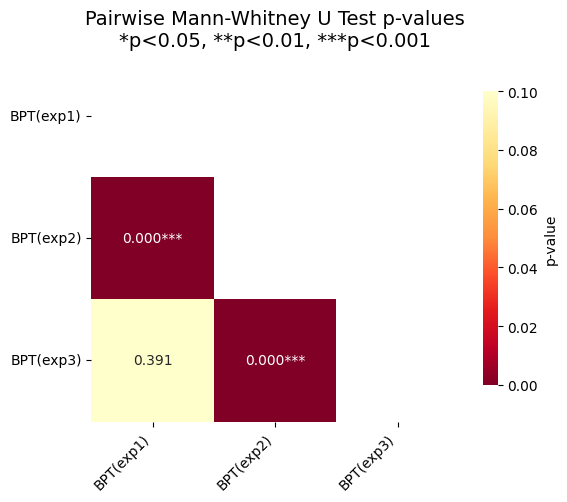

In [58]:
_ = pairwise_mannwhitney(B_combs, alpha=0.05)

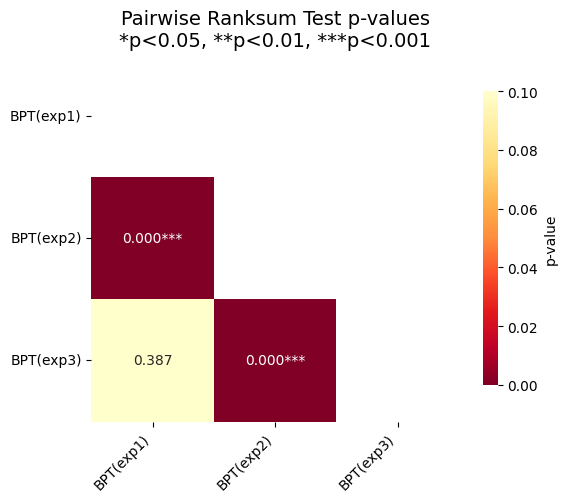

In [59]:
_ = pairwise_ranksums(B_combs, alpha=0.05)

- #### Two-phase shuffle:

In [60]:
T_combs = [('TPT', 'exp1'), ('TPT', 'exp2'), ('TPT', 'exp3')]

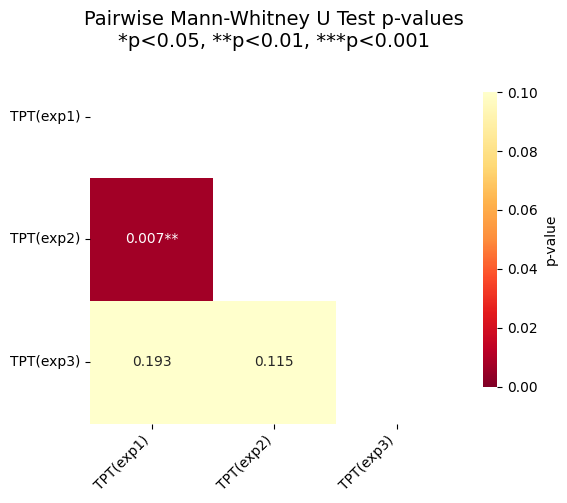

In [61]:
_ = pairwise_mannwhitney(T_combs, alpha=0.05)

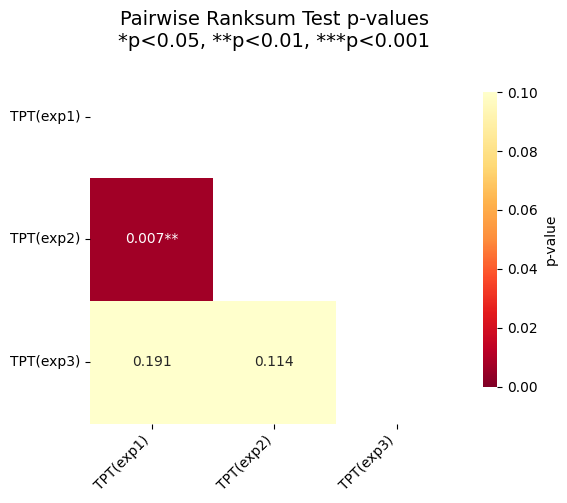

In [62]:
_ = pairwise_ranksums(T_combs, alpha=0.05)

### Best combinations

In [53]:
# TOP 3 
best_comb = [('SPT', 'exp3'), ('SPT', 'exp2'), ('BPT', 'exp3'), ('BPT', 'exp1')]

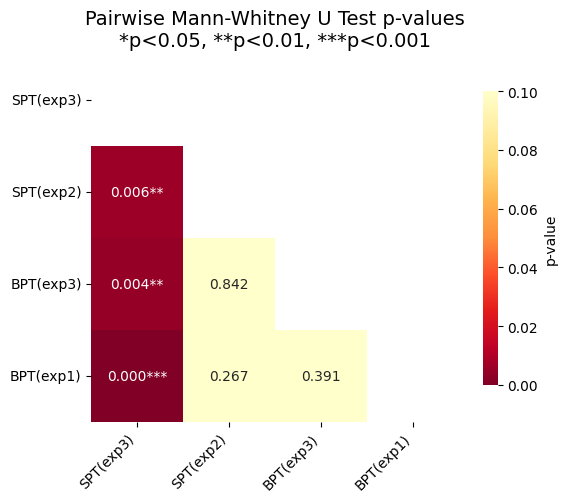

In [56]:
_ = pairwise_mannwhitney(best_comb, alpha=0.05)

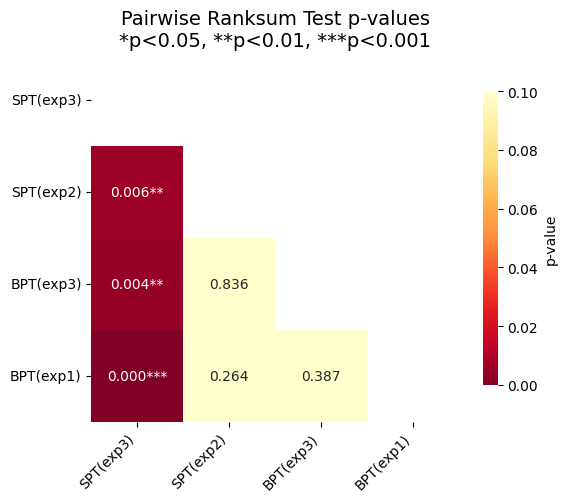

In [55]:
_ = pairwise_ranksums(best_comb, alpha=0.05)